# Detección de Contornos y Transformaciones Morfológicas en OpenCV
Este notebook explica cómo utilizar transformaciones morfológicas en imágenes para modificar y analizar estructuras, así como detectar contornos usando OpenCV.


## 1. Importación de bibliotecas necesarias
Vamos a usar OpenCV para procesar imágenes y `matplotlib` para visualizarlas.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline


## 2. Función para cargar y generar una imagen base
La función `load_img()` crea una imagen en blanco con texto en el centro. Esto nos ayudará a demostrar las transformaciones.


In [ ]:
def load_img():
    blank_img = np.zeros((600, 600), dtype=np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='BARAK', org=(50, 300), fontFace=font, fontScale=5, color=(255, 255, 255), thickness=25, lineType=cv2.LINE_AA)
    return blank_img


## 3. Función para mostrar imágenes
La función `display_img()` permite visualizar una imagen en escala de grises con un tamaño adecuado.


In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')


## 4. Creación y visualización de la imagen base

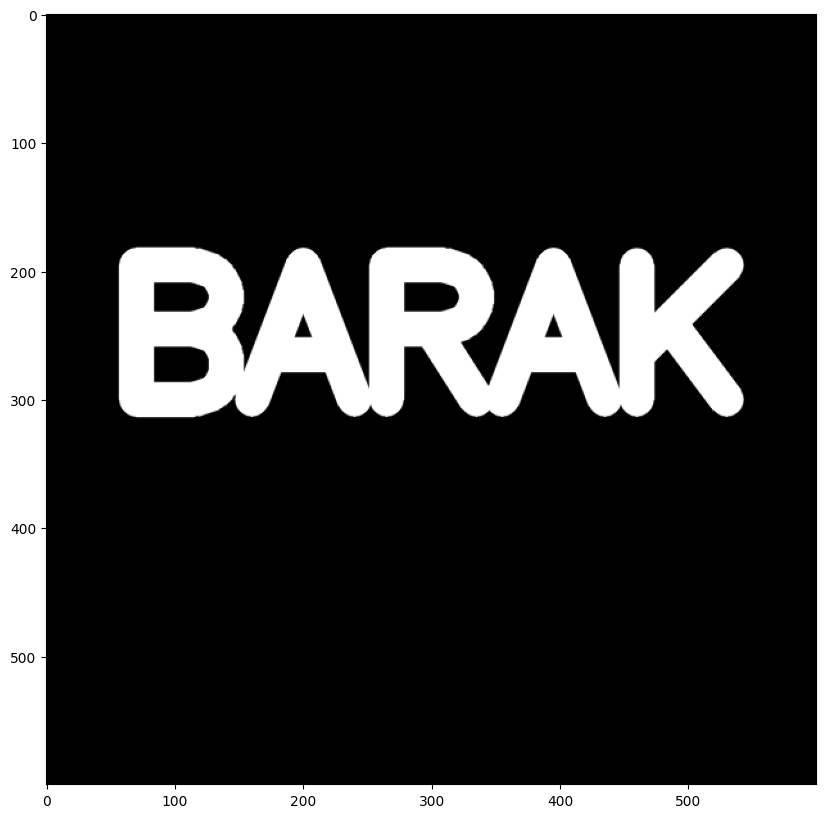

In [ ]:
img = load_img()
display_img(img)


## 5. Matriz de Convolución (Kernel)
Un **kernel** es una pequeña matriz, normalmente de tamaño 3x3, 5x5, etc. Se utiliza para aplicar operaciones como desenfoque, detección de bordes y transformación morfológica. Aquí creamos un kernel de 5x5 de unos.


In [ ]:
kernel = np.ones((5, 5), np.uint8)

In [ ]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

## 6. Erosión
La **erosión** reduce los bordes de los objetos blancos en la imagen. Es útil para eliminar pequeñas irregularidades o ruidos. Se aplica un kernel que "erosiona" las áreas blancas.


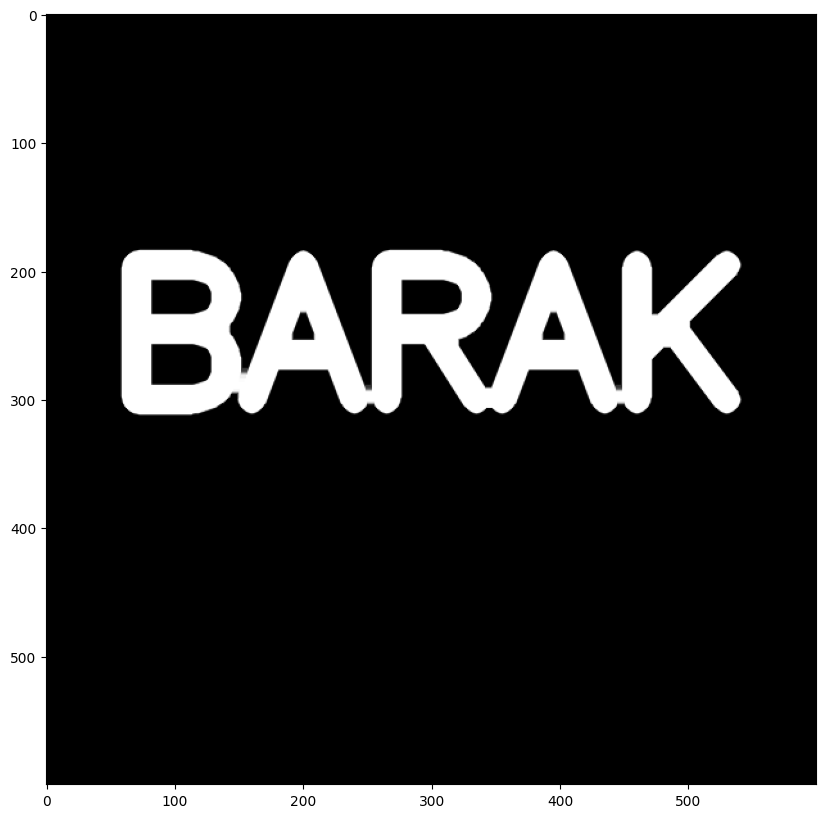

In [ ]:
erosion1 = cv2.erode(img, kernel, iterations=1)
display_img(erosion1)

Podemos aumentar las iteraciones para observar un efecto mayor de erosión:


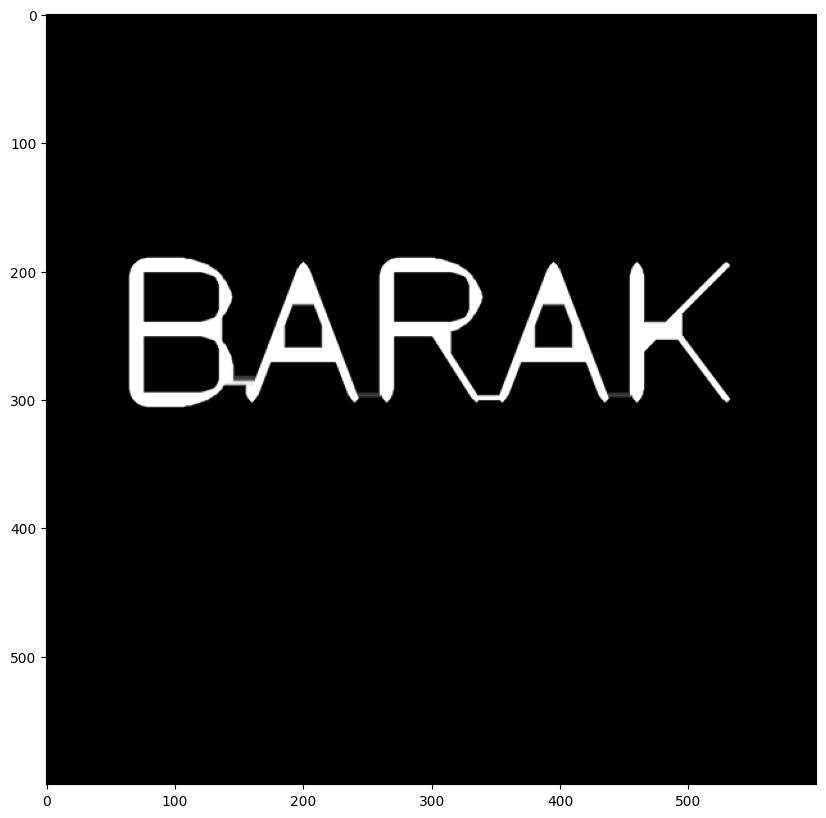

In [ ]:
erosion4 = cv2.erode(img, kernel, iterations=4)
display_img(erosion4)

## 7. Dilatación
 La **dilatación** es lo opuesto a la erosión. Expande las áreas blancas en la imagen, rellenando huecos y expandiendo contornos.


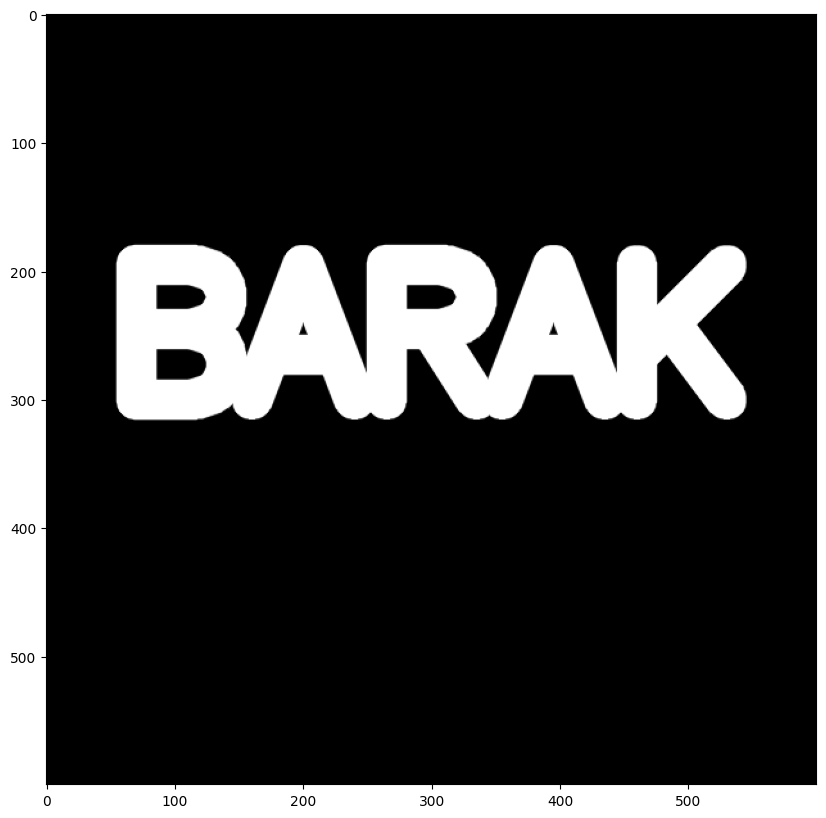

In [ ]:
dilation = cv2.dilate(img, kernel, iterations=1)
display_img(dilation)

## 8. Apertura
La **apertura** es una erosión seguida de una dilatación. Es útil para eliminar ruido en el fondo de la imagen, como pequeños puntos blancos que no forman parte de los objetos principales.



Creamos ruido blanco en la imagen

In [ ]:
white_noise = np.random.randint(low=0, high=2, size=(600, 600)).astype(np.uint8) * 255
noise_img = white_noise + img

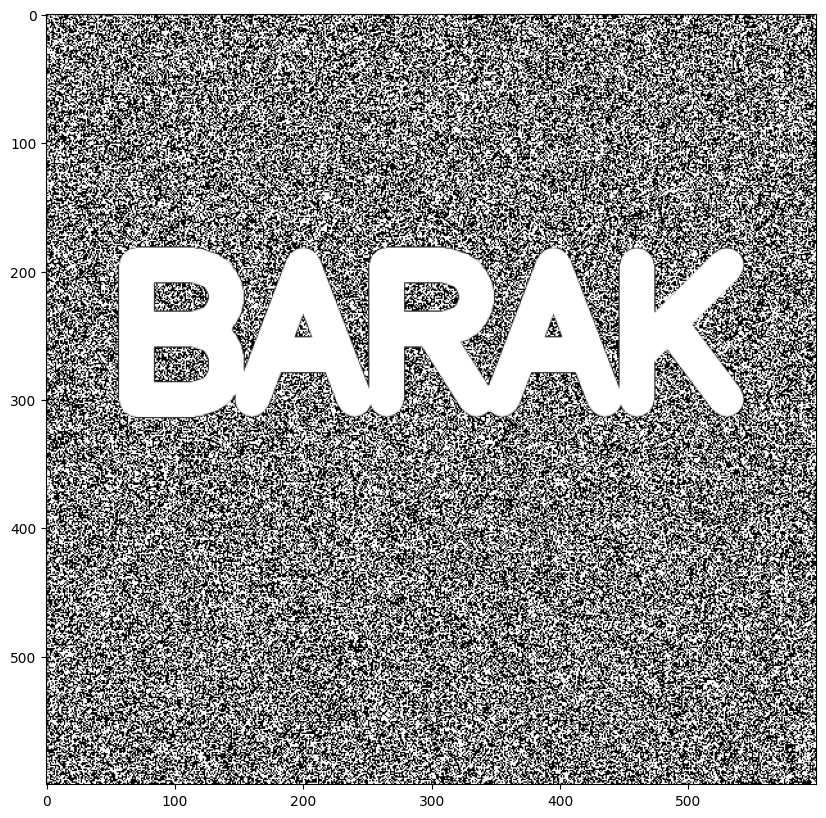

In [ ]:
display_img(noise_img)

Aplicamos apertura para eliminar el ruido blanco

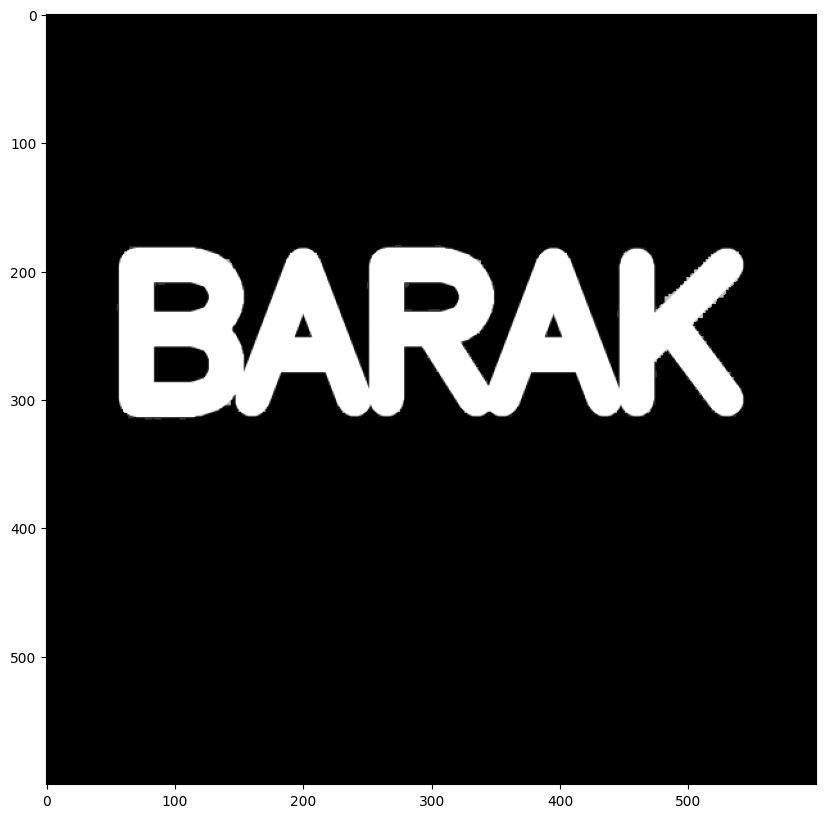

In [ ]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

## 9. Cierre
El **cierre** es una dilatación seguida de una erosión. Es útil para eliminar ruidos en los objetos principales, como pequeños puntos negros que pueden aparecer dentro de un objeto blanco.



Creamos ruido negro en la imagen

In [ ]:
black_noise = np.random.randint(low=0, high=2, size=(600, 600)).astype(np.uint8) * -255
black_noise_img = img + black_noise
# Posiciones de la matriz que tiene el valoir de -255 --> 0
black_noise_img[black_noise_img == -255] = 0

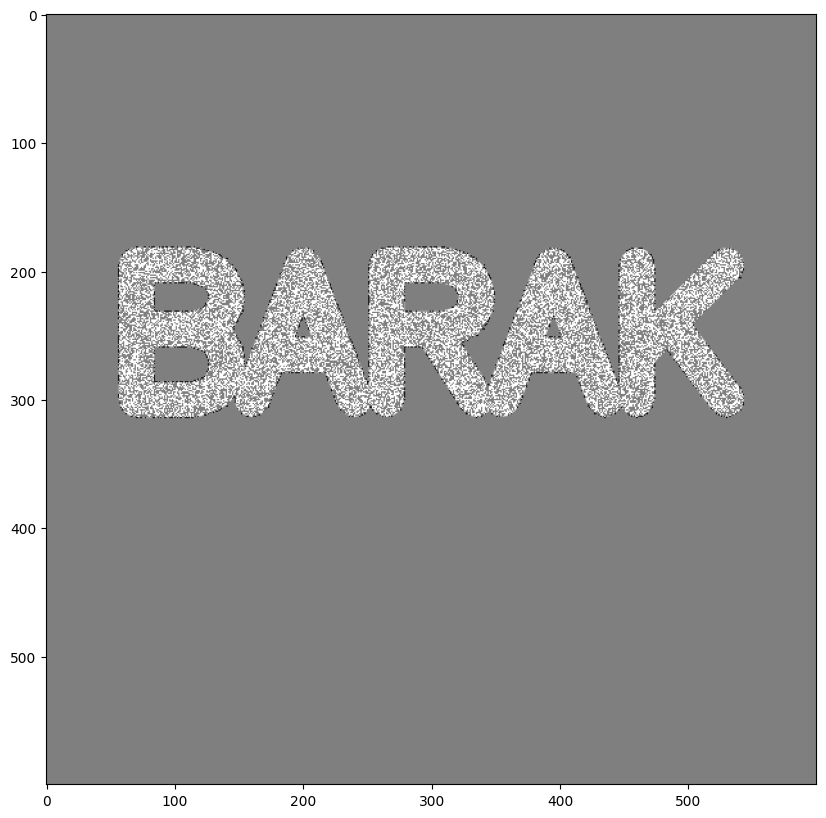

In [ ]:
display_img(black_noise_img)

Aplicamos cierre para eliminar el ruido negro

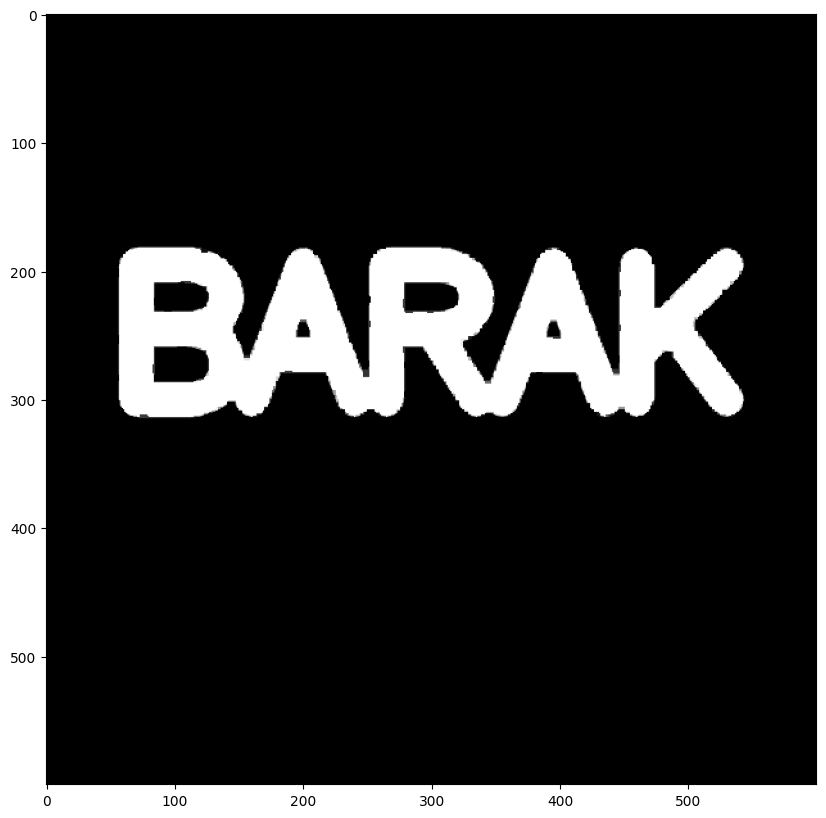

In [ ]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

## 10. Gradiente Morfológico
El **gradiente morfológico** es la diferencia entre la dilatación y la erosión de una imagen. Resalta los contornos de los objetos, útil para detección de bordes.


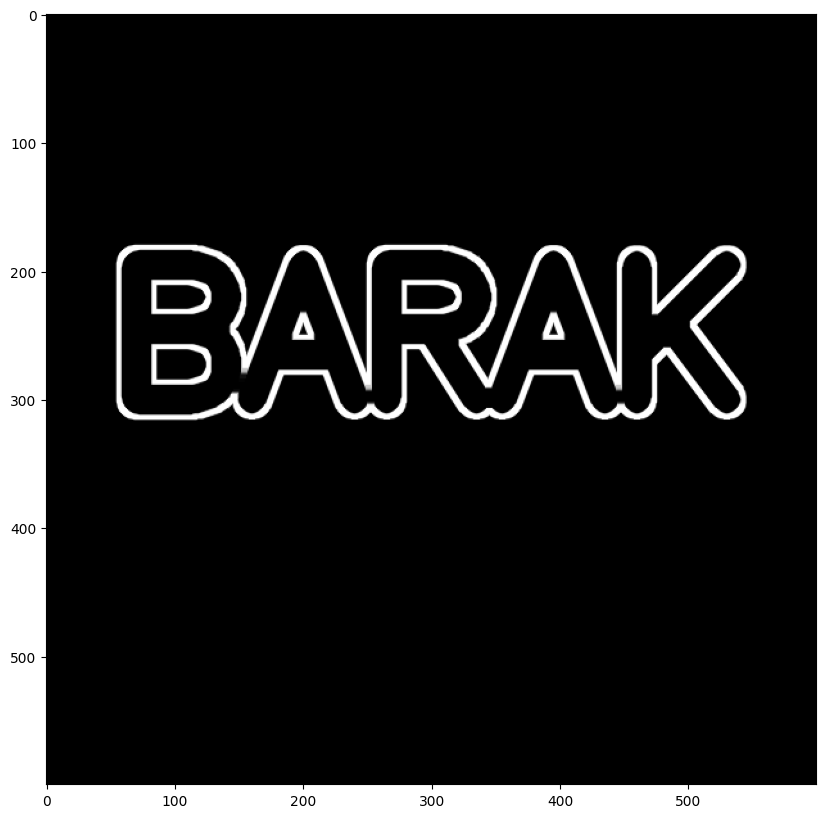

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)

# Procesamiento Morfológico de Texto con OpenCV
En este tutorial, aplicaremos diversas transformaciones morfológicas a una imagen de texto usando OpenCV. Estas técnicas se utilizan comúnmente para mejorar la calidad de las imágenes, eliminar ruido y resaltar características importantes en imágenes binarias.


## Importación de Bibliotecas
 Comenzamos importando las bibliotecas necesarias: `cv2` para procesamiento de imágenes y `numpy` para manejar matrices. También usaremos `matplotlib` para visualizar las imágenes.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

## Cargar y Visualizar la Imagen Inicial
 Cargamos la imagen en escala de grises. Esta imagen debe ser un archivo de texto en blanco y negro para observar claramente los efectos de las transformaciones morfológicas.



Cargar la imagen en escala de grises

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir='/content/drive/MyDrive/Colab Notebooks/cursoProcesamientoImagenes_opencv/Clase 01/images/'
img = cv2.imread('/content/7.jpg', 0)

Función para mostrar la imagen usando matplotlib


In [ ]:
def display_img(img, title="Imagen"):
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

Mostrar la imagen original

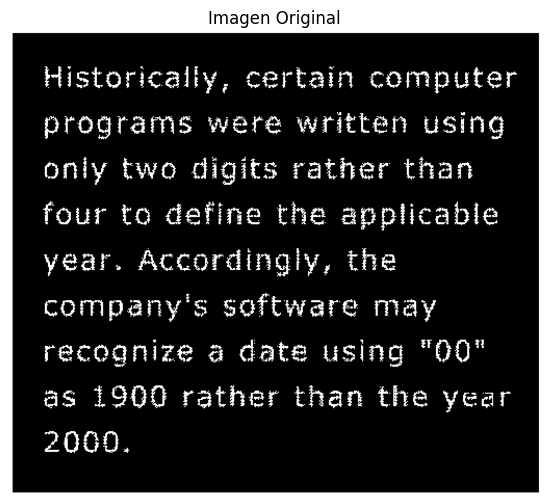

In [ ]:
display_img(img, "Imagen Original")

## Definir Kernels (Matrices Estructurantes)
 Los kernels son matrices pequeñas que se utilizan para aplicar transformaciones morfológicas. Aquí definimos dos kernels: uno de 5x5 y otro de 2x2 para observar cómo afectan las transformaciones según el tamaño.



Definir kernels de diferentes tamaños


In [ ]:
kernel = np.ones((5, 5), np.uint8)  # Kernel de 5x5
kernel2 = np.ones((2, 2), np.uint8)  # Kernel de 2x2

## Aplicar Transformaciones Morfológicas
A continuación, aplicaremos las operaciones morfológicas más comunes: erosión, dilatación, apertura y cierre.


### 1. Erosión
 La erosión reduce el tamaño de las áreas blancas en la imagen (las letras en este caso), eliminando bordes y pequeñas imperfecciones.



Aplicar erosión

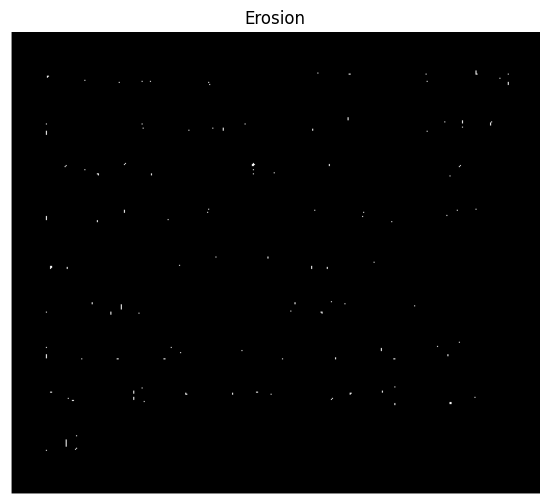

In [ ]:
img_erosion = cv2.erode(img, kernel, iterations=1)
display_img(img_erosion, "Erosion")

### 2. Dilatación
La dilatación es lo opuesto a la erosión. Expande las áreas blancas, haciendo que las letras sean más gruesas y rellenando huecos.


Aplicar dilatación con un kernel más pequeño

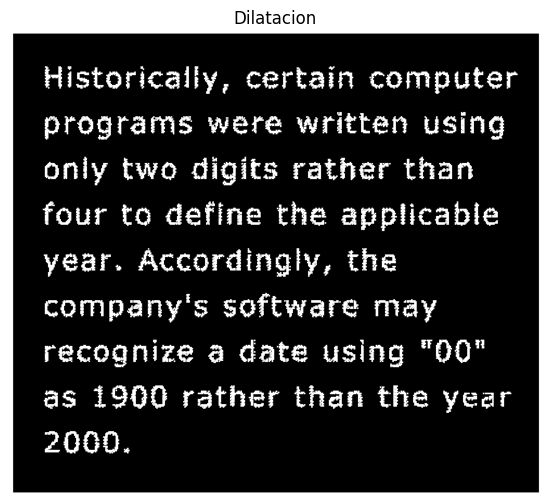

In [ ]:
img_dilation = cv2.dilate(img, kernel2, iterations=1)
display_img(img_dilation, "Dilatacion")

### 3. Apertura
 La apertura es una combinación de erosión seguida de dilatación. Es útil para eliminar pequeñas manchas o ruido en el fondo de la imagen.



Aplicar apertura

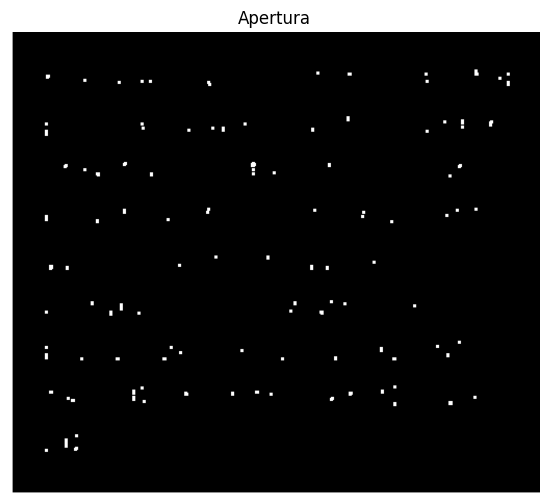

In [ ]:
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
display_img(img_opening, "Apertura")

### 4. Cierre
 El cierre es una combinación de dilatación seguida de erosión. Se utiliza para rellenar pequeños huecos o puntos negros en las áreas blancas.



Aplicar cierre

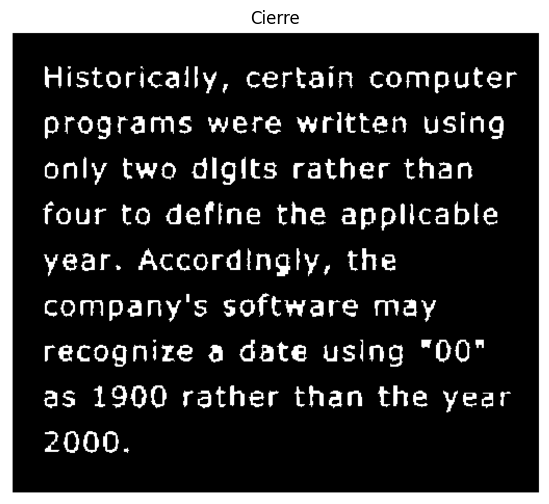

In [ ]:
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
display_img(img_closing, "Cierre")

## Combinación de Transformaciones
 Vamos a combinar las operaciones de dilatación y erosión para observar cómo interactúan entre sí y cómo pueden mejorar la calidad del texto.


Aplicar dilatación y luego erosión

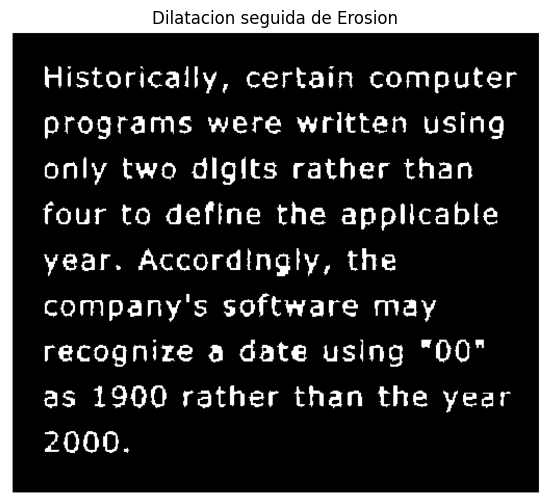

In [ ]:
img_dilation2 = cv2.dilate(img, kernel, iterations=1)
img_erosion2 = cv2.erode(img_dilation2, kernel, iterations=1)
display_img(img_erosion2, "Dilatacion seguida de Erosion")

 ## Procesamiento Avanzado: Combinación de Múltiples Operaciones
Podemos combinar varias operaciones para ver cómo se afectan entre sí. Aquí, creamos dos combinaciones de transformaciones para observar diferentes resultados.


Combinación de transformaciones

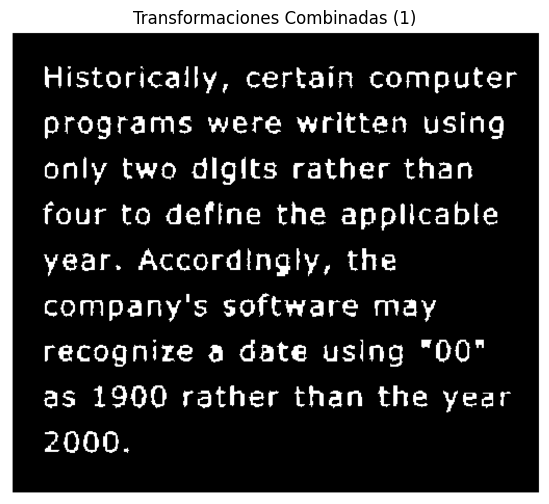

In [ ]:
processed_1 = img_closing - img_erosion + img_opening
display_img(processed_1, "Transformaciones Combinadas (1)")

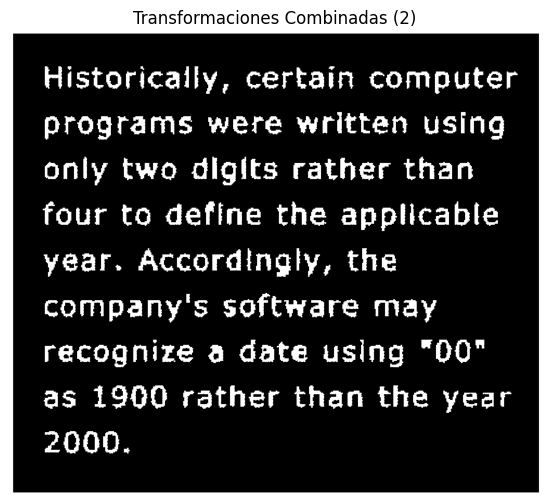

In [ ]:
processed_2 = img_dilation + img_closing - img_erosion + img_opening
display_img(processed_2, "Transformaciones Combinadas (2)")

## Guardar Resultados
Guardamos los resultados de las operaciones morfológicas en archivos para un análisis posterior.



Guardar imágenes resultantes

In [ ]:
cv2.imwrite('Dilation.png', img_dilation)
cv2.imwrite('Dilation_Erosion.png', img_erosion2)
cv2.imwrite('Processed_1.png', processed_1)
cv2.imwrite('Processed_2.png', processed_2)

NameError: name 'processed_2' is not defined

## Conclusión
 En este tutorial, hemos aplicado diversas operaciones morfológicas para mejorar y analizar imágenes de texto. Estos métodos son fundamentales en el procesamiento de imágenes para aplicaciones como reconocimiento de texto (OCR) y mejora de imágenes.


Cerrar todas las ventanas de OpenCV

In [ ]:
cv2.destroyAllWindows()

 # Procesamiento Morfológico de Huellas Dactilares con OpenCV

En este tutorial, aplicaremos diversas transformaciones morfológicas a imágenes de huellas dactilares usando OpenCV. Estas técnicas son esenciales para mejorar la calidad de las huellas, resaltar detalles y preparar las imágenes para sistemas de reconocimiento de huellas.


## Importación de Bibliotecas
Comenzamos importando las bibliotecas necesarias: `cv2` para procesamiento de imágenes y `numpy` para manejar matrices. Usaremos también `matplotlib` para visualizar las imágenes.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

 ## Cargar y Visualizar las Imágenes Iniciales
Cargamos dos imágenes: una de huella dactilar para procesar y otra para usarla como comparación en los resultados.


Cargar las imágenes en escala de grises

In [2]:

img = cv2.imread('/content/7.jpg', 0)
#img2 = cv2.imread('/content/9-p.jpg', 0)

Función para mostrar la imagen usando matplotlib


In [3]:
def display_img(img, title="Imagen"):
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

Mostrar la imagen original de la huella

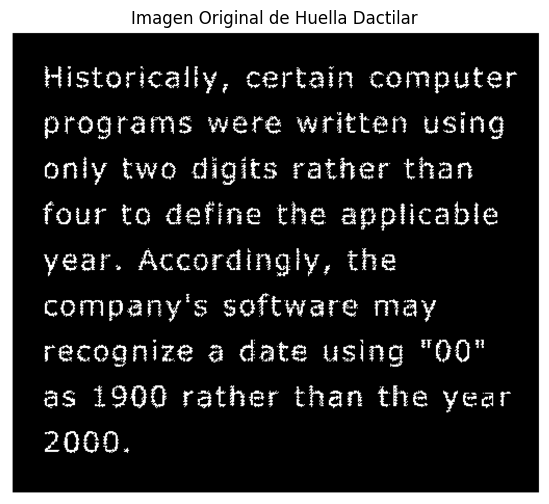

In [4]:
display_img(img, "Imagen Original de Huella Dactilar")

## Definir Kernels (Matrices Estructurantes)
Los kernels son matrices pequeñas que determinan la vecindad de píxeles afectados durante las transformaciones morfológicas. Aquí definimos tres kernels: uno más grande, otro mediano y uno en forma de cruz.


Definir kernels de diferentes tamaños y formas

In [5]:
kernel = np.ones((5, 5), np.uint8)  # Kernel de 5x5
kernel2 = np.ones((7, 7), np.uint8)  # Kernel de 7x7
kernel3 = np.array((
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]), dtype='uint8')  # Kernel en forma de cruz (3x3)


## Aplicar Transformaciones Morfológicas
Vamos a aplicar diversas operaciones morfológicas para mejorar la calidad de la huella y resaltar sus características.


### 1. Apertura
 La apertura es una erosión seguida de una dilatación. Es útil para eliminar pequeños puntos o manchas en la imagen de la huella.



Aplicar apertura

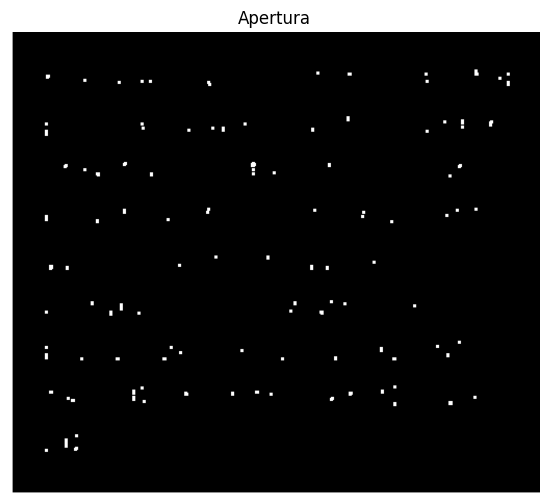

In [6]:
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
display_img(img_opening, "Apertura")


### 2. Cierre<br>
 El cierre es una dilatación seguida de erosión. Es útil para rellenar pequeños huecos en las líneas de la huella y mejorar su continuidad.



Aplicar cierre

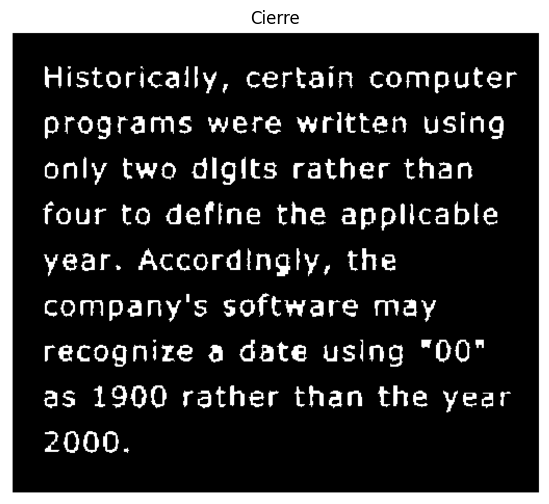

In [7]:
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
display_img(img_closing, "Cierre")

### 3. Erosión y Dilatación Combinadas
 Aplicamos erosión para reducir bordes y luego dilatación para expandirlos nuevamente, usando un kernel en forma de cruz para preservar las características en forma de línea de la huella.


Aplicar erosión y luego dilatación

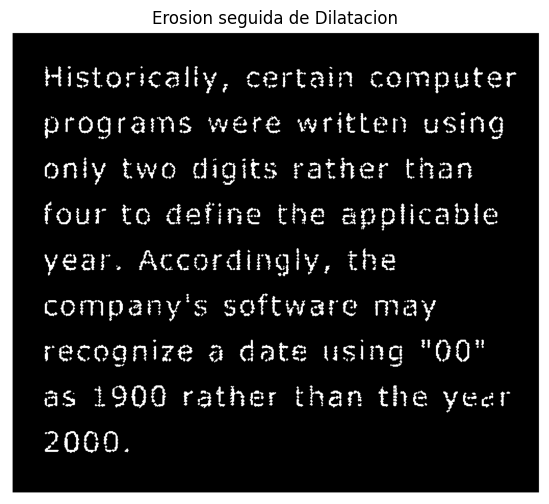

In [8]:
img_erosion = cv2.erode(img, kernel3, iterations=1)
img_dilation = cv2.dilate(img_erosion, kernel3, iterations=1)
display_img(img_dilation, "Erosion seguida de Dilatacion")

 ### 4. Combinación de Transformaciones: Apertura y Cierre Adicionales
 Aplicamos una apertura y luego un cierre para limpiar y mejorar aún más la imagen. Usamos un kernel más grande para estas operaciones.



Apertura y cierre adicionales

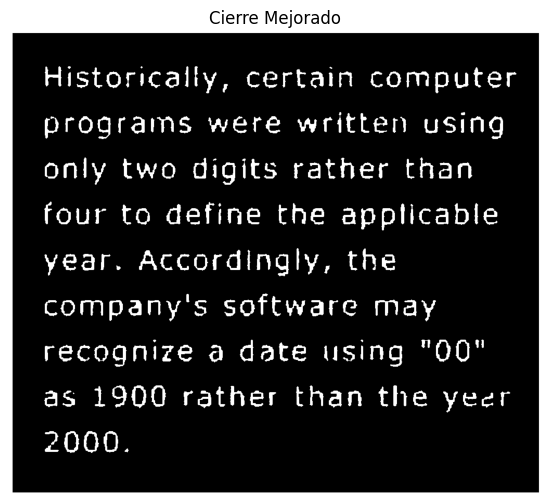

In [9]:
img_opening3 = cv2.morphologyEx(img_dilation, cv2.MORPH_OPEN, kernel2)
img_closing2 = cv2.morphologyEx(img_dilation, cv2.MORPH_CLOSE, kernel)
display_img(img_closing2, "Cierre Mejorado")

### 5. Aplicación Adicional de Apertura
 Aplicamos otra apertura sobre el resultado anterior para observar cómo se reduce aún más el ruido mientras se mantienen las características importantes.



Aplicar otra apertura

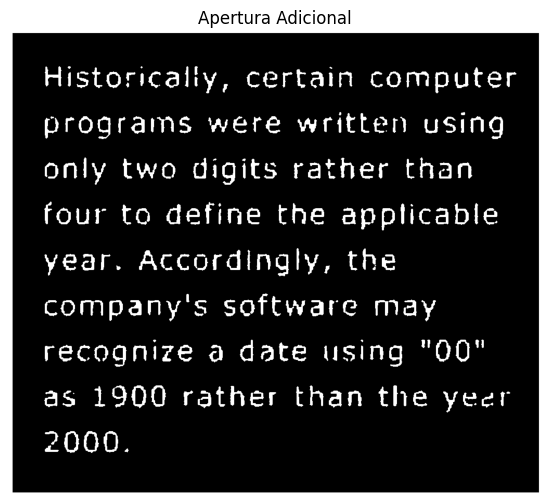

In [10]:
img_opening2 = cv2.morphologyEx(img_closing2, cv2.MORPH_OPEN, kernel3)
display_img(img_opening2, "Apertura Adicional")


## Procesamiento Final: Apertura y Cierre Combinados
 Combinamos la apertura y el cierre para ver cómo se mejora la calidad y continuidad de la huella dactilar.


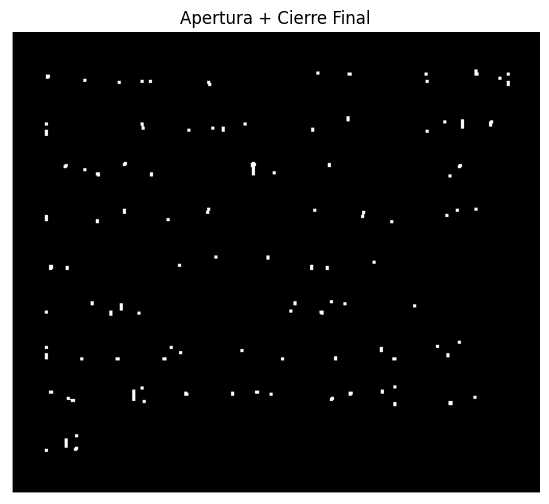

In [11]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
display_img(close, "Apertura + Cierre Final")

## Comparación Final con Otra Imagen de Huella
 Mostramos la imagen de comparación (`img2`) para contrastar el resultado procesado con otra huella.


In [12]:
display_img(img2, "Imagen de Comparacion")

NameError: name 'img2' is not defined


## Guardar Resultados
 Guardamos los resultados de las operaciones morfológicas en archivos para un análisis posterior.


Guardar imágenes resultantes

In [ ]:
cv2.imwrite('Input.png', img)
cv2.imwrite('Opening.png', img_opening)
cv2.imwrite('Closing.png', img_closing)
cv2.imwrite('ErosionPlusDilation.png', img_dilation)
cv2.imwrite('ErodeDilateClose.png', img_closing2)
cv2.imwrite('Processed.png', img_closing2)
cv2.imwrite('Final-ComparisionImage.png', img2)
cv2.imwrite('Improved.png', close)

## Conclusión
Hemos aplicado transformaciones morfológicas para mejorar la claridad y calidad de una huella dactilar, preparando la imagen para futuros procesos de análisis o reconocimiento. Cada operación aplicada tiene un propósito específico, desde eliminar ruido hasta mejorar la continuidad de las líneas de la huella.
